In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [4]:
sns.set(style = 'whitegrid')

tips = sns.load_dataset('tips')

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
tips.shape

(244, 7)

In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
tips.describe(include = 'all').fillna('')

,total_bill,tip,sex,smoker,day,time,size
count,244.0,244.0,244,244,244,244,244.0
unique,,,2,2,4,2,
top,,,Male,No,Sat,Dinner,
freq,,,157,151,87,176,
mean,19.785943,2.998279,,,,,2.569672
std,8.902412,1.383638,,,,,0.9511
min,3.07,1.0,,,,,1.0
25%,13.3475,2.0,,,,,2.0
50%,17.795,2.9,,,,,2.0
75%,24.1275,3.5625,,,,,3.0


In [13]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [14]:
sum(tips.isna().sum())

0

In [15]:
tips.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [16]:
sum(tips.duplicated())

1

In [18]:
~tips.duplicated()

0      True
1      True
2      True
3      True
4      True
       ... 
239    True
240    True
241    True
242    True
243    True
Length: 244, dtype: bool

In [19]:
sum(~tips.duplicated() )

243

In [22]:
tipz = tips[(~tips.duplicated() )]

In [24]:
tipz.shape

(243, 7)

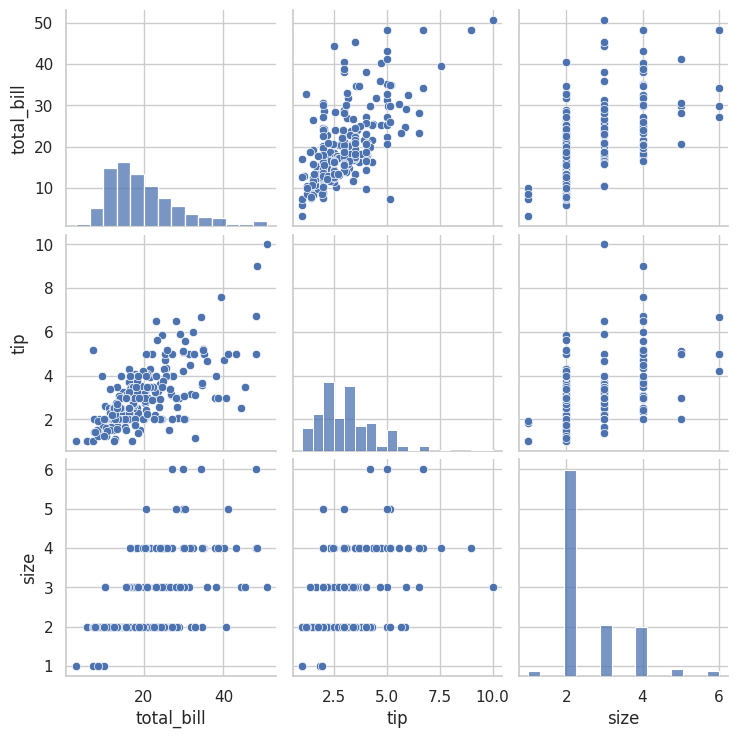

In [30]:
sns.pairplot(tipz)

<Axes: ylabel='Frequency'>

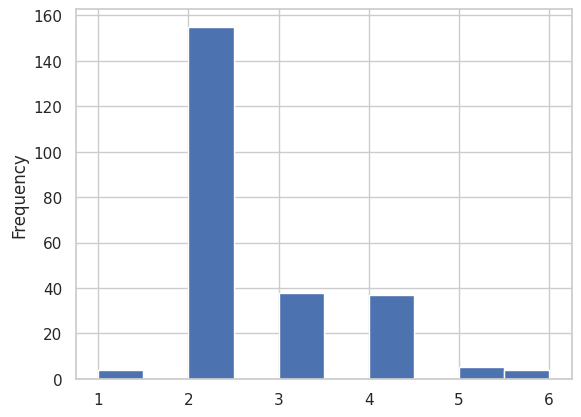

In [32]:
tipz['size'].plot.hist()

In [38]:
tipz['size'].value_counts()

2    155
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [39]:
tipz.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

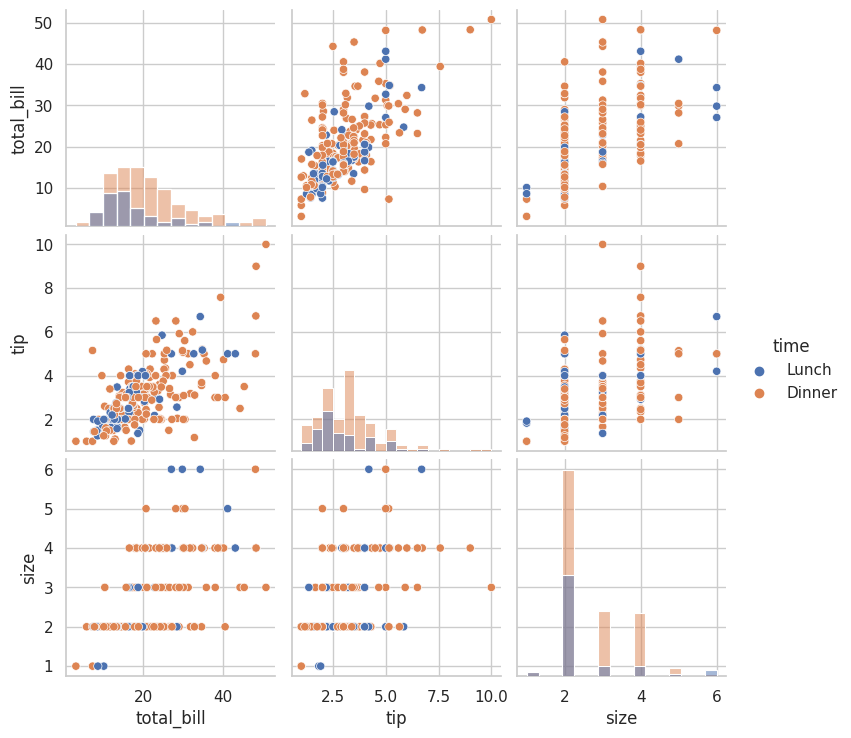

In [42]:
sns.pairplot(tipz, hue = 'time', diag_kind= 'hist')

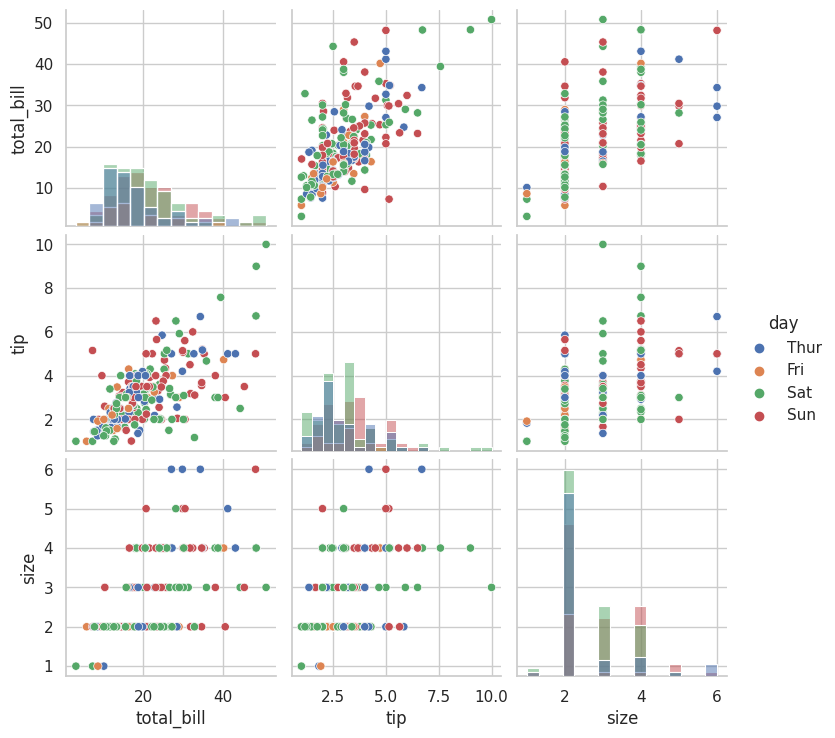

In [44]:
sns.pairplot(tipz, hue = 'day', diag_kind= 'hist')

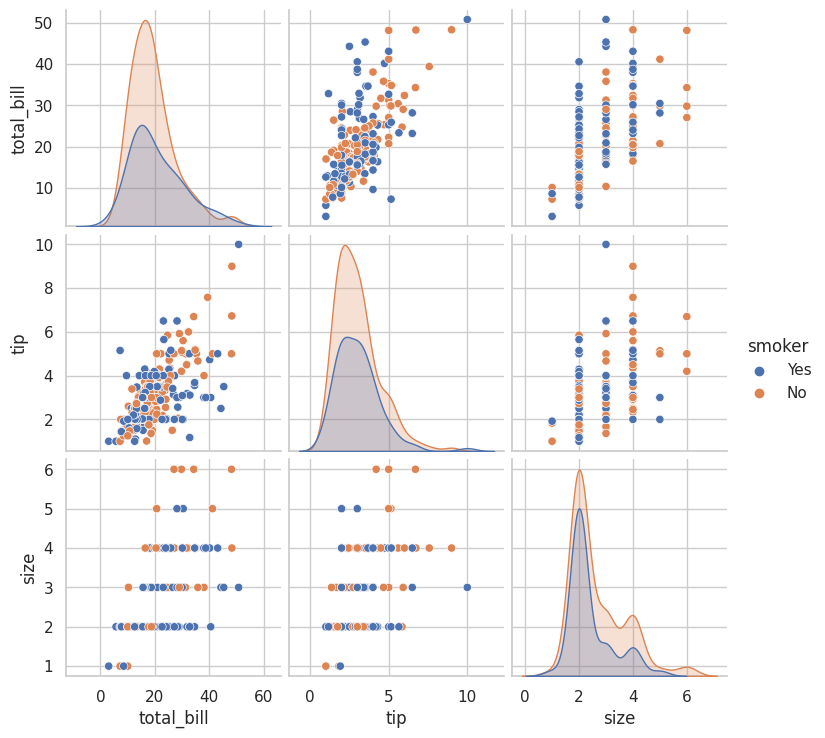

In [45]:
sns.pairplot(tipz, hue = 'smoker')

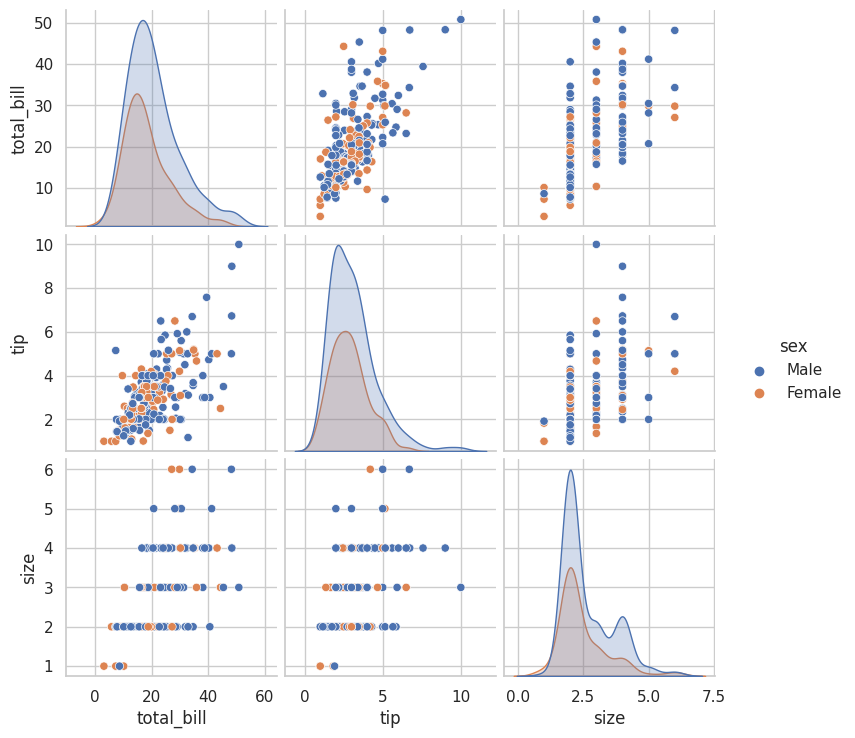

In [49]:
sns.pairplot(tipz, hue = 'sex')

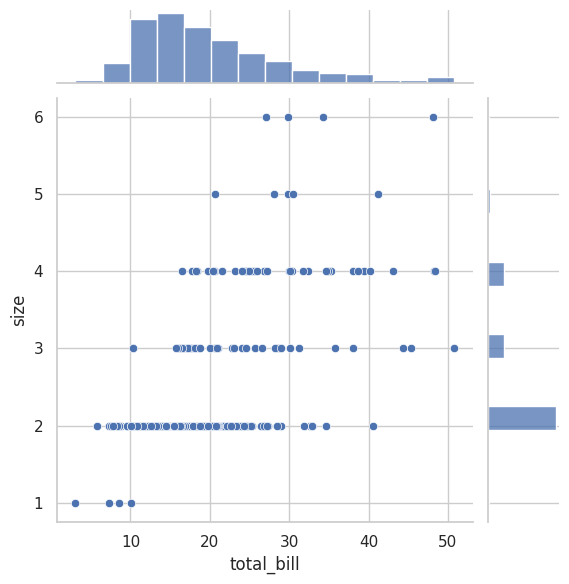

In [50]:
sns.jointplot(tipz, x = 'total_bill', y = 'size')

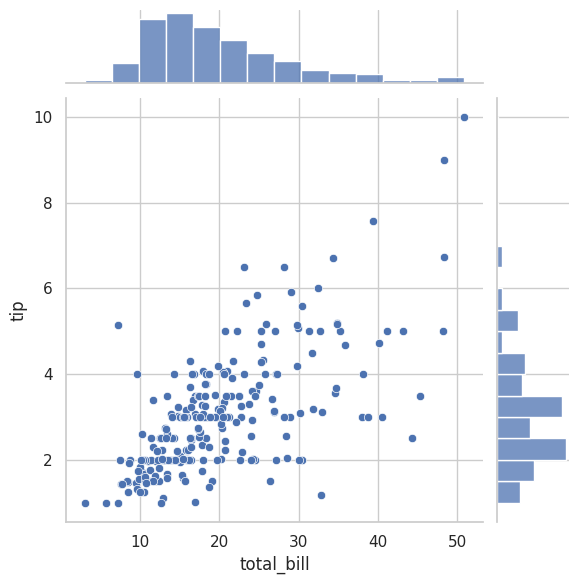

In [52]:
sns.jointplot(tipz, x = 'total_bill', y = 'tip')

In [53]:
tipz

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [57]:
tipz['sex'].value_counts()

Male      157
Female     86
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='tip'>

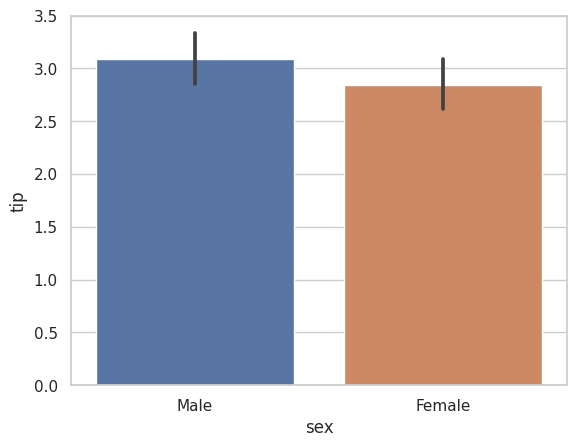

In [58]:
sns.barplot(tipz, x = 'sex', y = 'tip')

In [59]:
tipz['smoker'].value_counts()

No     151
Yes     92
Name: smoker, dtype: int64

<Axes: xlabel='smoker', ylabel='tip'>

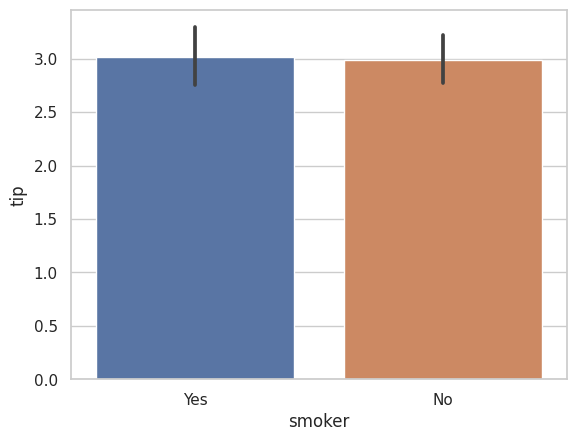

In [60]:
sns.barplot(tipz, x = 'smoker', y  = 'tip')

In [62]:
tipz['logtip'] = np.log(tipz['tip'])

In [63]:
tipz

,total_bill,tip,sex,smoker,day,time,size,logtip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.009950
1,10.34,1.66,Male,No,Sun,Dinner,3,0.506818
2,21.01,3.50,Male,No,Sun,Dinner,3,1.252763
3,23.68,3.31,Male,No,Sun,Dinner,2,1.196948
4,24.59,3.61,Female,No,Sun,Dinner,4,1.283708
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.778336
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.693147
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.693147
242,17.82,1.75,Male,No,Sat,Dinner,2,0.559616


In [64]:
tipz['logtip']

0      0.009950
1      0.506818
2      1.252763
3      1.196948
4      1.283708
         ...   
239    1.778336
240    0.693147
241    0.693147
242    0.559616
243    1.098612
Name: logtip, Length: 243, dtype: float64

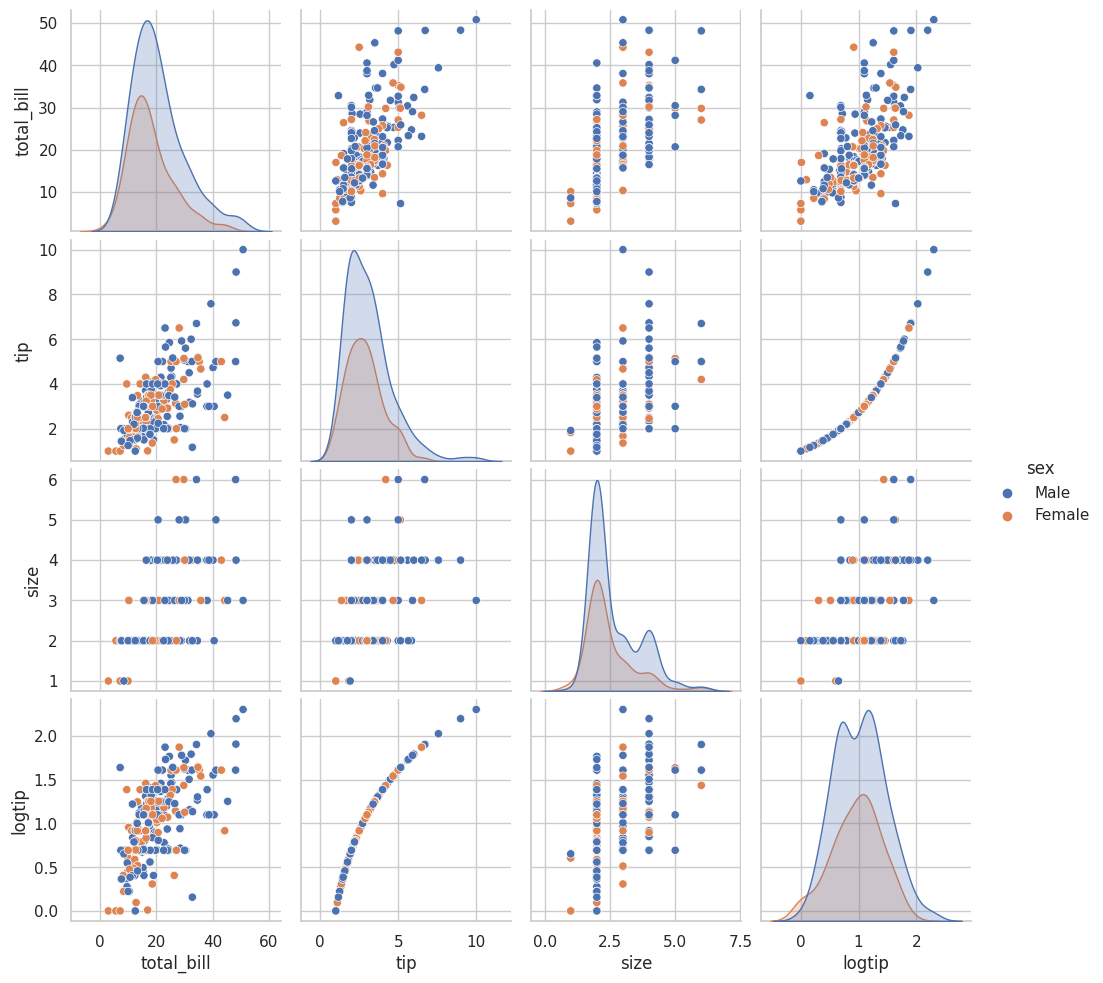

In [65]:
sns.pairplot(tipz, hue = 'sex')

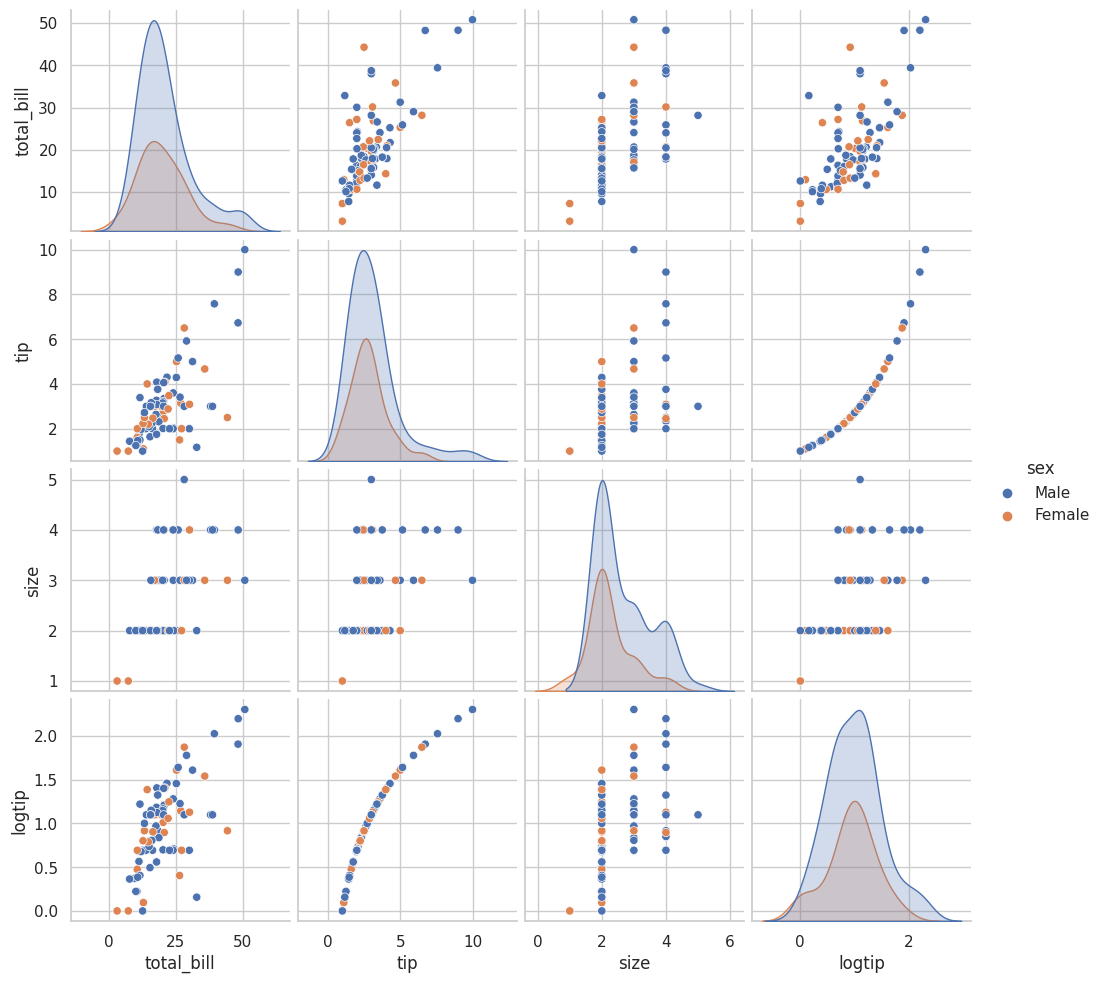

In [67]:
sns.pairplot(tipz[tipz['day'] == 'Sat'], hue = 'sex')

In [68]:
sattips = tipz[tipz['day'] == 'Sat']

In [69]:
sattips

,total_bill,tip,sex,smoker,day,time,size,logtip
19,20.65,3.35,Male,No,Sat,Dinner,3,1.208960
20,17.92,4.08,Male,No,Sat,Dinner,2,1.406097
21,20.29,2.75,Female,No,Sat,Dinner,2,1.011601
22,15.77,2.23,Female,No,Sat,Dinner,2,0.802002
23,39.42,7.58,Male,No,Sat,Dinner,4,2.025513
...,...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3,1.541159
239,29.03,5.92,Male,No,Sat,Dinner,3,1.778336
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.693147
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.693147


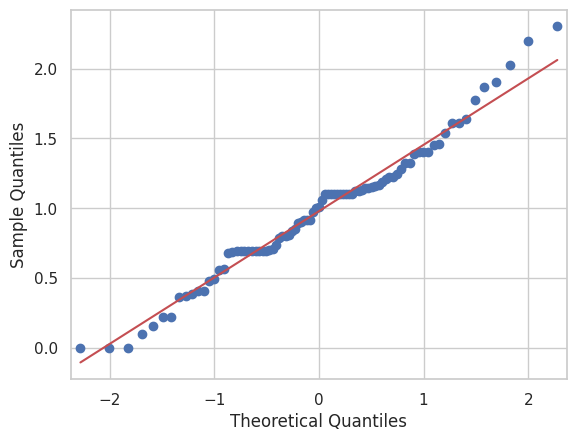

In [73]:
qqplot(sattips['logtip'], line = 's')
plt.show()

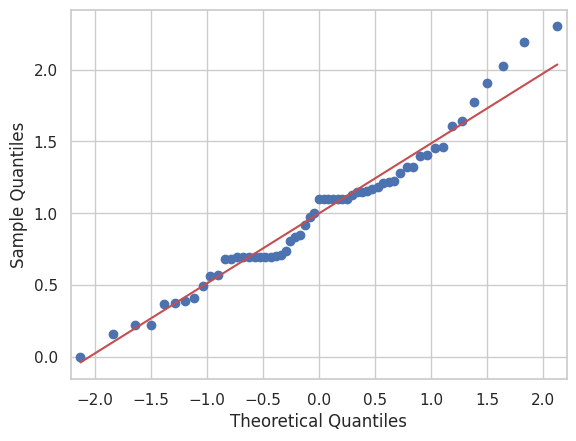

In [76]:
qqplot(sattips[sattips['sex'] == 'Male']['logtip'], line = 's')
plt.show()

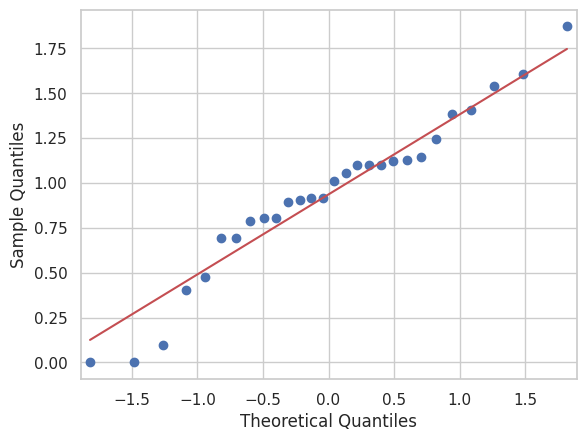

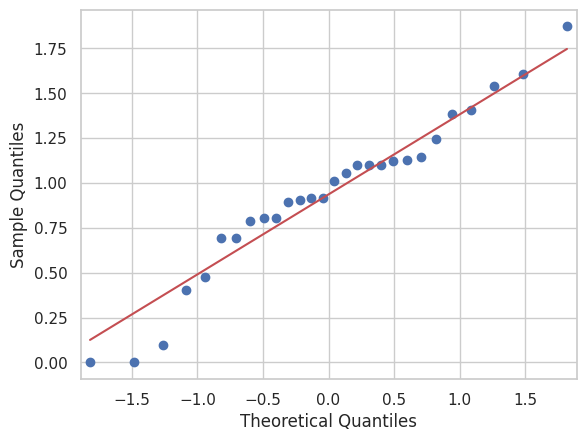

In [77]:
qqplot(sattips[sattips['sex'] == 'Female']['logtip'], line = 's')

In [78]:
from scipy import stats

In [79]:
stats.ttest_ind(sattips[sattips['sex'] == 'Female']['logtip'], sattips[sattips['sex'] == 'Male']['logtip'])


TtestResult(statistic=-0.560970302757729, pvalue=0.576293639664478, df=85.0)

In [80]:
tipz[tipz['smoker'] == 'Yes'].mean()

total_bill    20.840652
tip            3.019674
size           2.413043
logtip         1.008674
dtype: float64

In [81]:
tipz[tipz['smoker'] == 'No'].mean()

total_bill    19.188278
tip            2.991854
size           2.668874
logtip         1.000848
dtype: float64

<Axes: xlabel='smoker', ylabel='tip'>

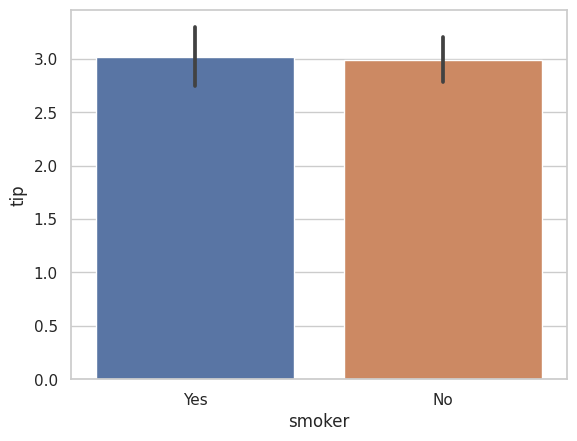

In [82]:
sns.barplot(tipz, x = 'smoker', y = 'tip')

In [83]:
solar = pd.read_csv('/installed-solar-PV-capacity.csv')

In [84]:
solar.head()

,Entity,Code,Year,Solar Capacity
0,Africa,NaN,1996,0.001012
1,Africa,NaN,1997,0.003037
2,Africa,NaN,1998,0.005062
3,Africa,NaN,1999,0.008099
4,Africa,NaN,2000,0.010927


In [93]:
entities = solar['Entity'].unique()

In [94]:
entities

array(['Africa', 'Algeria', 'Argentina', 'Asia Pacific', 'Australia',
       'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'CIS', 'Canada',
       'Chile', 'China', 'Czechia', 'Denmark', 'Egypt', 'Europe',
       'France', 'Germany', 'Greece', 'Honduras', 'Hungary', 'India',
       'Israel', 'Italy', 'Japan', 'Jordan', 'Malaysia', 'Mexico',
       'Middle East', 'Morocco', 'Netherlands', 'North America',
       'Other Africa', 'Other Asia Pacific', 'Other CIS', 'Other Europe',
       'Other Middle East', 'Other South & Central America', 'Pakistan',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Slovakia', 'South & Central America', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Vietnam', 'World'],
      dtype=object)

<Axes: xlabel='Year', ylabel='Solar Capacity'>

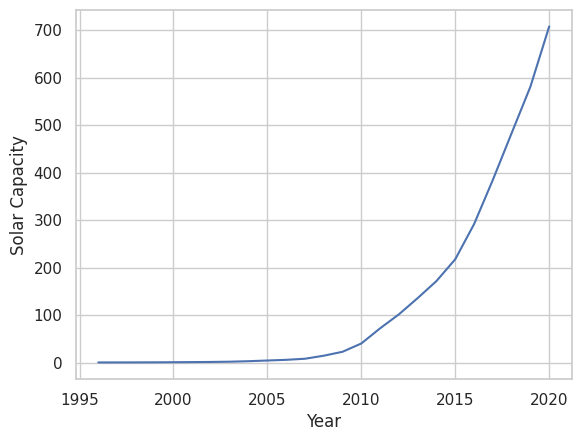

In [92]:
solar_world = solar[solar['Entity']=='World']
sns.lineplot(x='Year', y='Solar Capacity', data=solar_world)

In [95]:
continents = []
for e in entities:
  if e.startswith('Total'):
    continents.append(e)
continents

[]

In [97]:
continents = [
    'North America',
    'South & Central America',
    'Asia',
    'Australia',
    'Africa',
    'Europe'
]

<Axes: xlabel='Year', ylabel='Solar Capacity'>

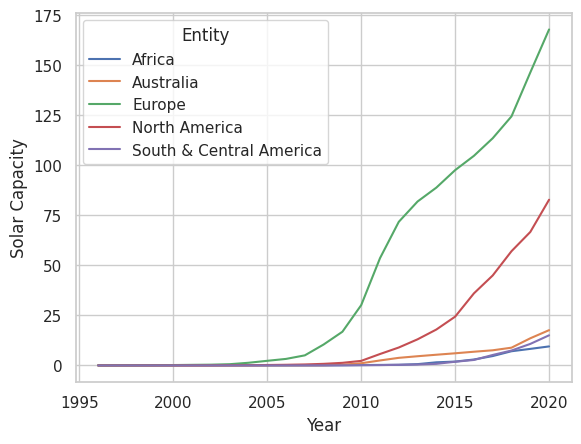

In [100]:
solar_continent = solar[solar['Entity'].isin(continents)]
sns.lineplot(x = 'Year', y = 'Solar Capacity', hue = 'Entity', data = solar_continent)

<Axes: xlabel='Year', ylabel='Solar Capacity'>

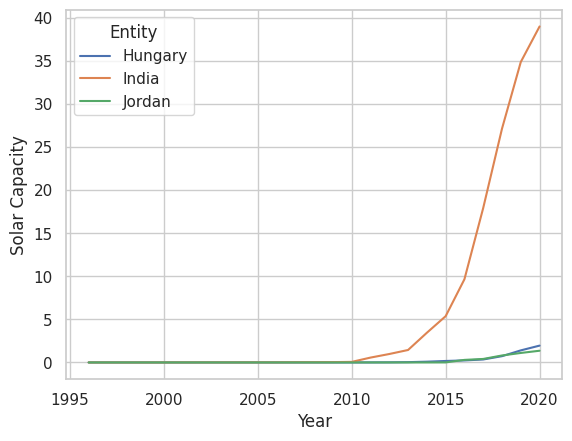

In [105]:
solar_country = solar[solar['Entity'].isin(['Jordan', 'Hungary', 'India'])]
sns.lineplot(x = 'Year', y = 'Solar Capacity', hue = 'Entity', data = solar_country)

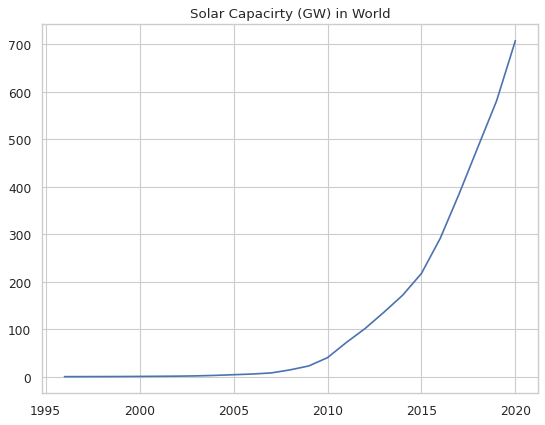

In [109]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.xlabel = ('Year')
plt.ylabel = ('Solar Capacity')
plt.title('Solar Capacirty (GW) in World')
plt.plot('Year', 'Solar Capacity', data= solar_world)
plt.show()